<a href="https://colab.research.google.com/github/Jahaslito/Compiler-Construction/blob/main/Compiler_Construction_Labs_Running_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Members

*  108130 - Jafer Abdikadir 
*  120138 - Michael Mwangi
*  116889 - Victoria Nyamai
*  123172 - Mohamed Gudle
*  120366 - Nicole Mulela


## LAB ONE (Flex, Bison, Lex, Yacc)



# Flex
(Fast LEXical analyzer generator) is a computer program for generating lexical analyzer.you only need to identify the vocabulary of a certain language, write a specification of patterns using regex, and FLEX will construct a scanner for you.Diagramatically the whole process looks like this.Since the Program was written in C , a C compiler is used. 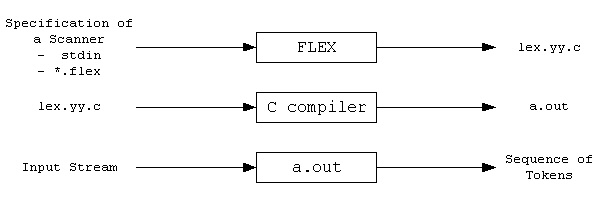

# Bison

* Bison is a parser generator that reads a specification in the BNF notation (a context-free language), warns about any parsing ambiguities, and generates a parser that reads sequences of tokens and decides whether the sequence conforms to the syntax specified by the grammar.
* It is designed for use with C code and generates a parser written in C. By default, the parser reads from stdin and
writes to stdout, just like a flex generated scanner does.
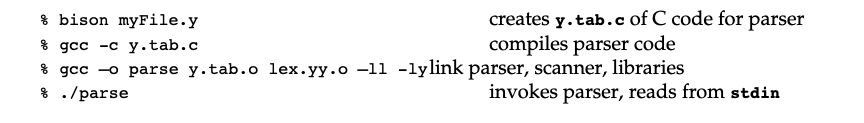


* Bison File Format




In [ ]:
%{
Declarations
%}
Definitions
%%
Productions
%%
User subroutines

# Lex
LEX is a tool used to generate a lexical analyzer. It is used with YACC parser generator.
The lexical analyzer is a program that transforms an input stream into a sequence of tokens.
It reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program.

The function of Lex is as follows:


1.   Firstly lexical analyzer creates a program lex.1 in the Lex language. Then Lex compiler runs the lex.1 program and produces a C program lex.yy.c.
2.   Finally C compiler runs the lex.yy.c program and produces an object program a.out.
3.   a.out is lexical analyzer that transforms an input stream into a sequence of tokens.



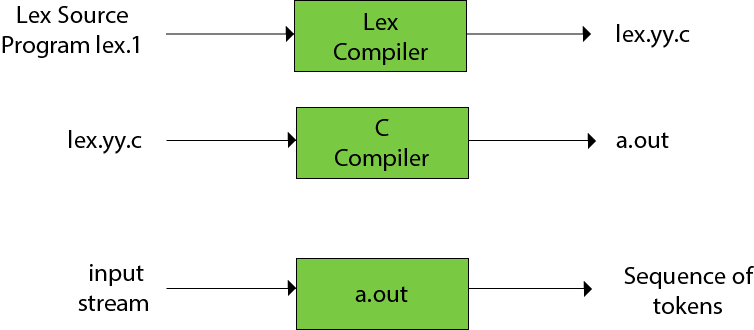


# Lex file format
A Lex program is separated into three sections by %% delimiters. The formal of Lex source is as follows:



In [ ]:
{ definitions }   
%%  
 { rules }   
%%   
{ user subroutines }  

* **Definitions** include declarations of constant, variable and regular 
definitions.

* **Rules** define the statement of form p1 {action1} p2 {action2}....pn {action}.

Where **pi** describes the regular expression and action1 describes the actions what action the lexical analyzer should take when pattern pi matches a lexeme.

* **User** **subroutines** are auxiliary procedures needed by the actions. The subroutine can be loaded with the lexical analyzer and compiled separately.

# Yacc
YACC is known as Yet Another Compiler Compiler. It generates the source code for the syntactic analyzer of the language generated by the LALR (1) grammar. A parser generator is a program that takes as input a specification of a syntax, and produces as output a procedure for recognizing that language. The input of YACC is the rule or grammar, and the output is a C program.
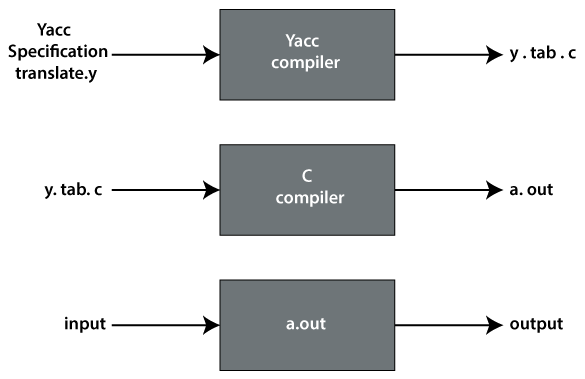


---


YACC input file is divided into three parts: definition, rule and auxilliary routines. 

1.   The definition part includes information about the tokens used in the syntax definition.
2.   The rules part contains grammar definition in a modified BNF form. It includes function definitions for every function needed in rules part. 
3.   It can also contain the main() function definition if the parser is going to be run as a program. 





 


# LAB 2

Using any TWO examples, show the conversion of NFA to DFA

 **NFA**
 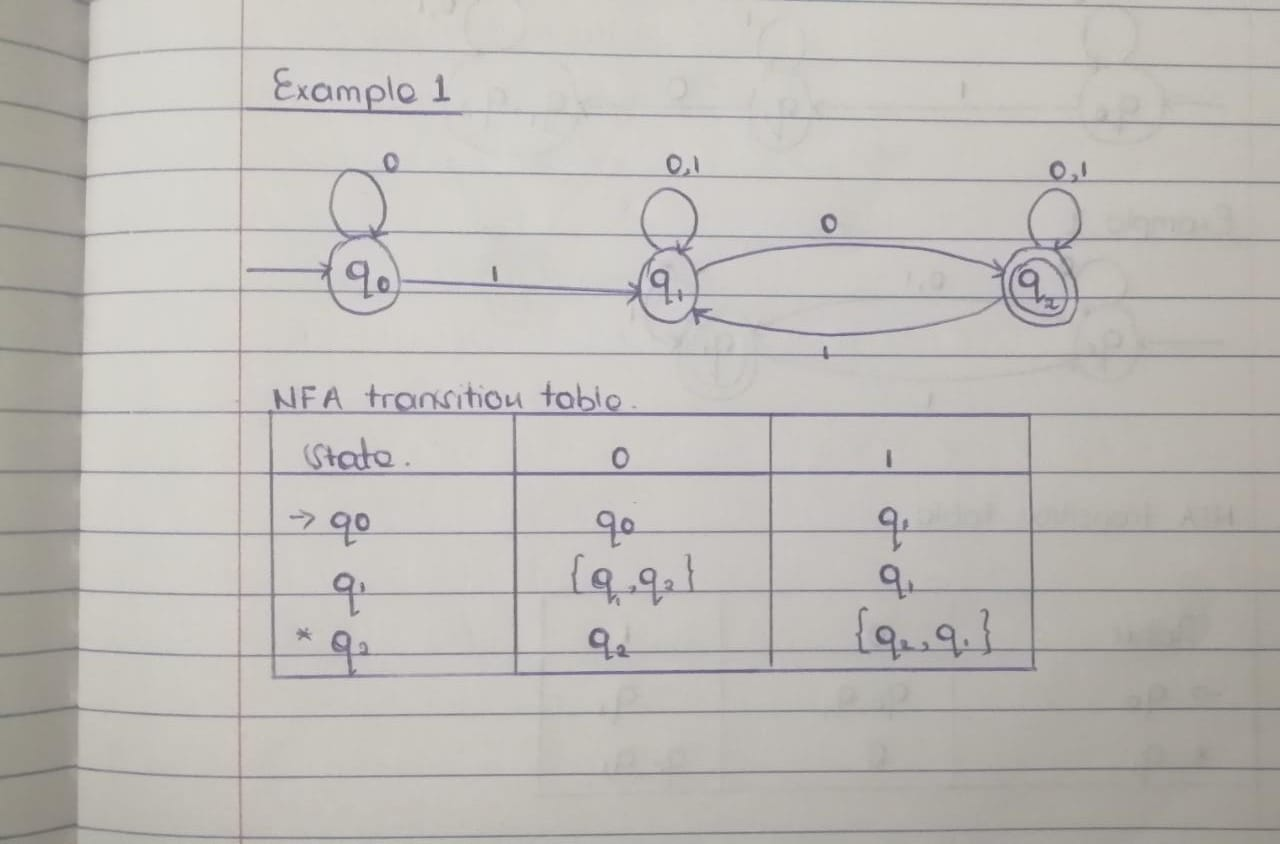

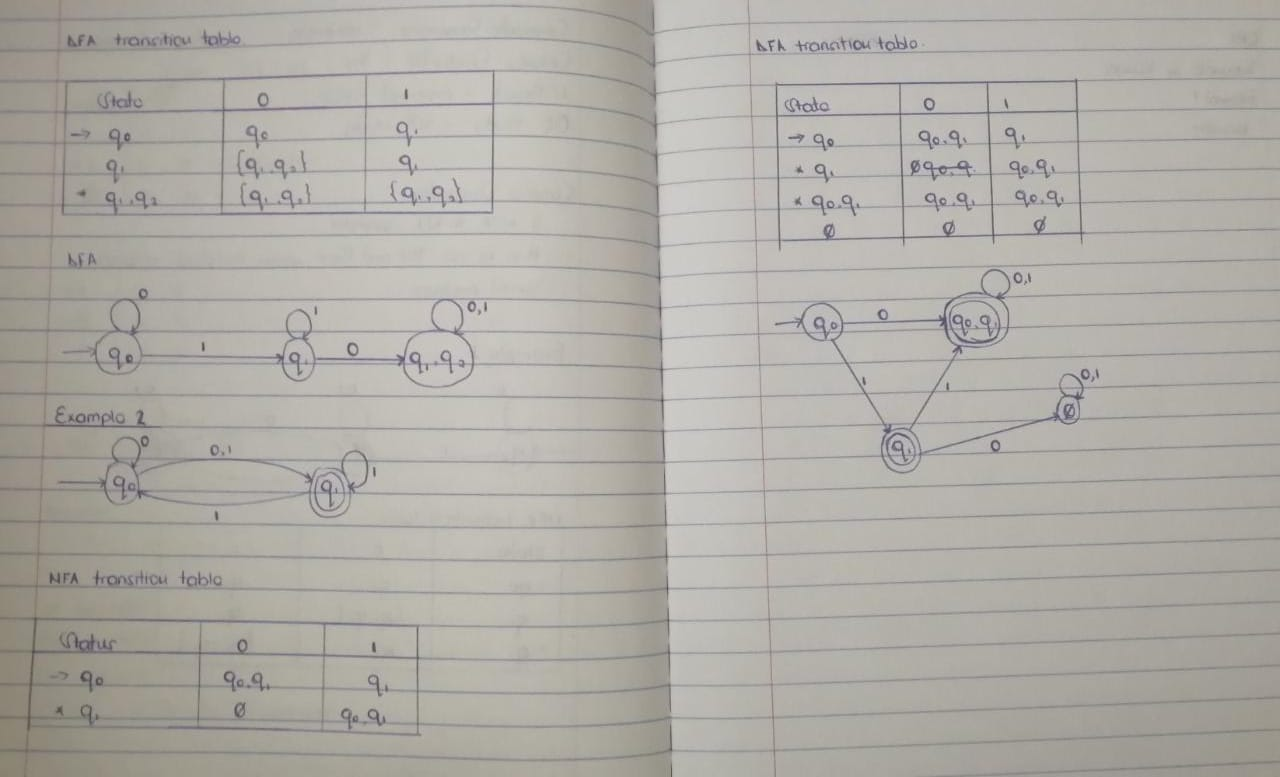

Using the material on E-Learning, show how to use Flex and Bison when building a simple lexical analyzer.

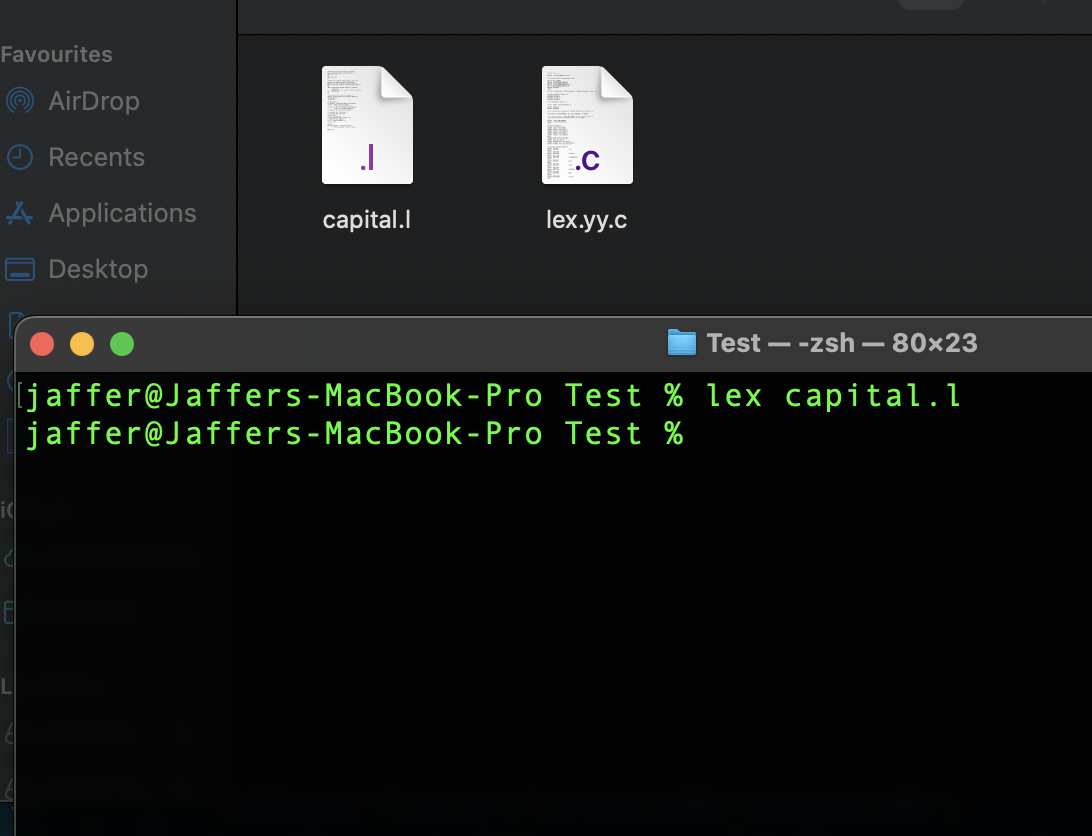

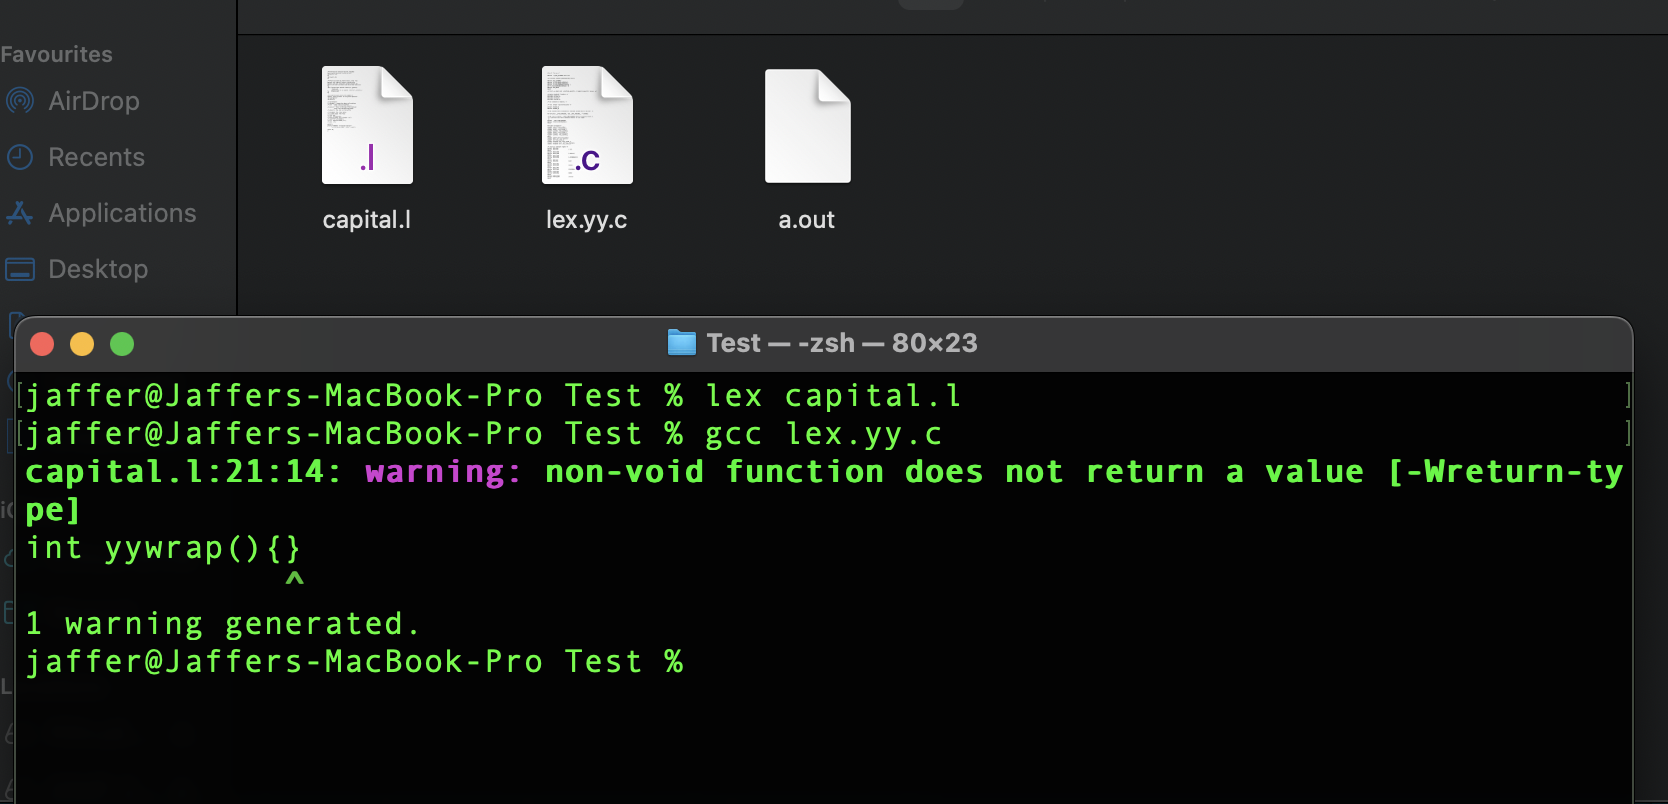

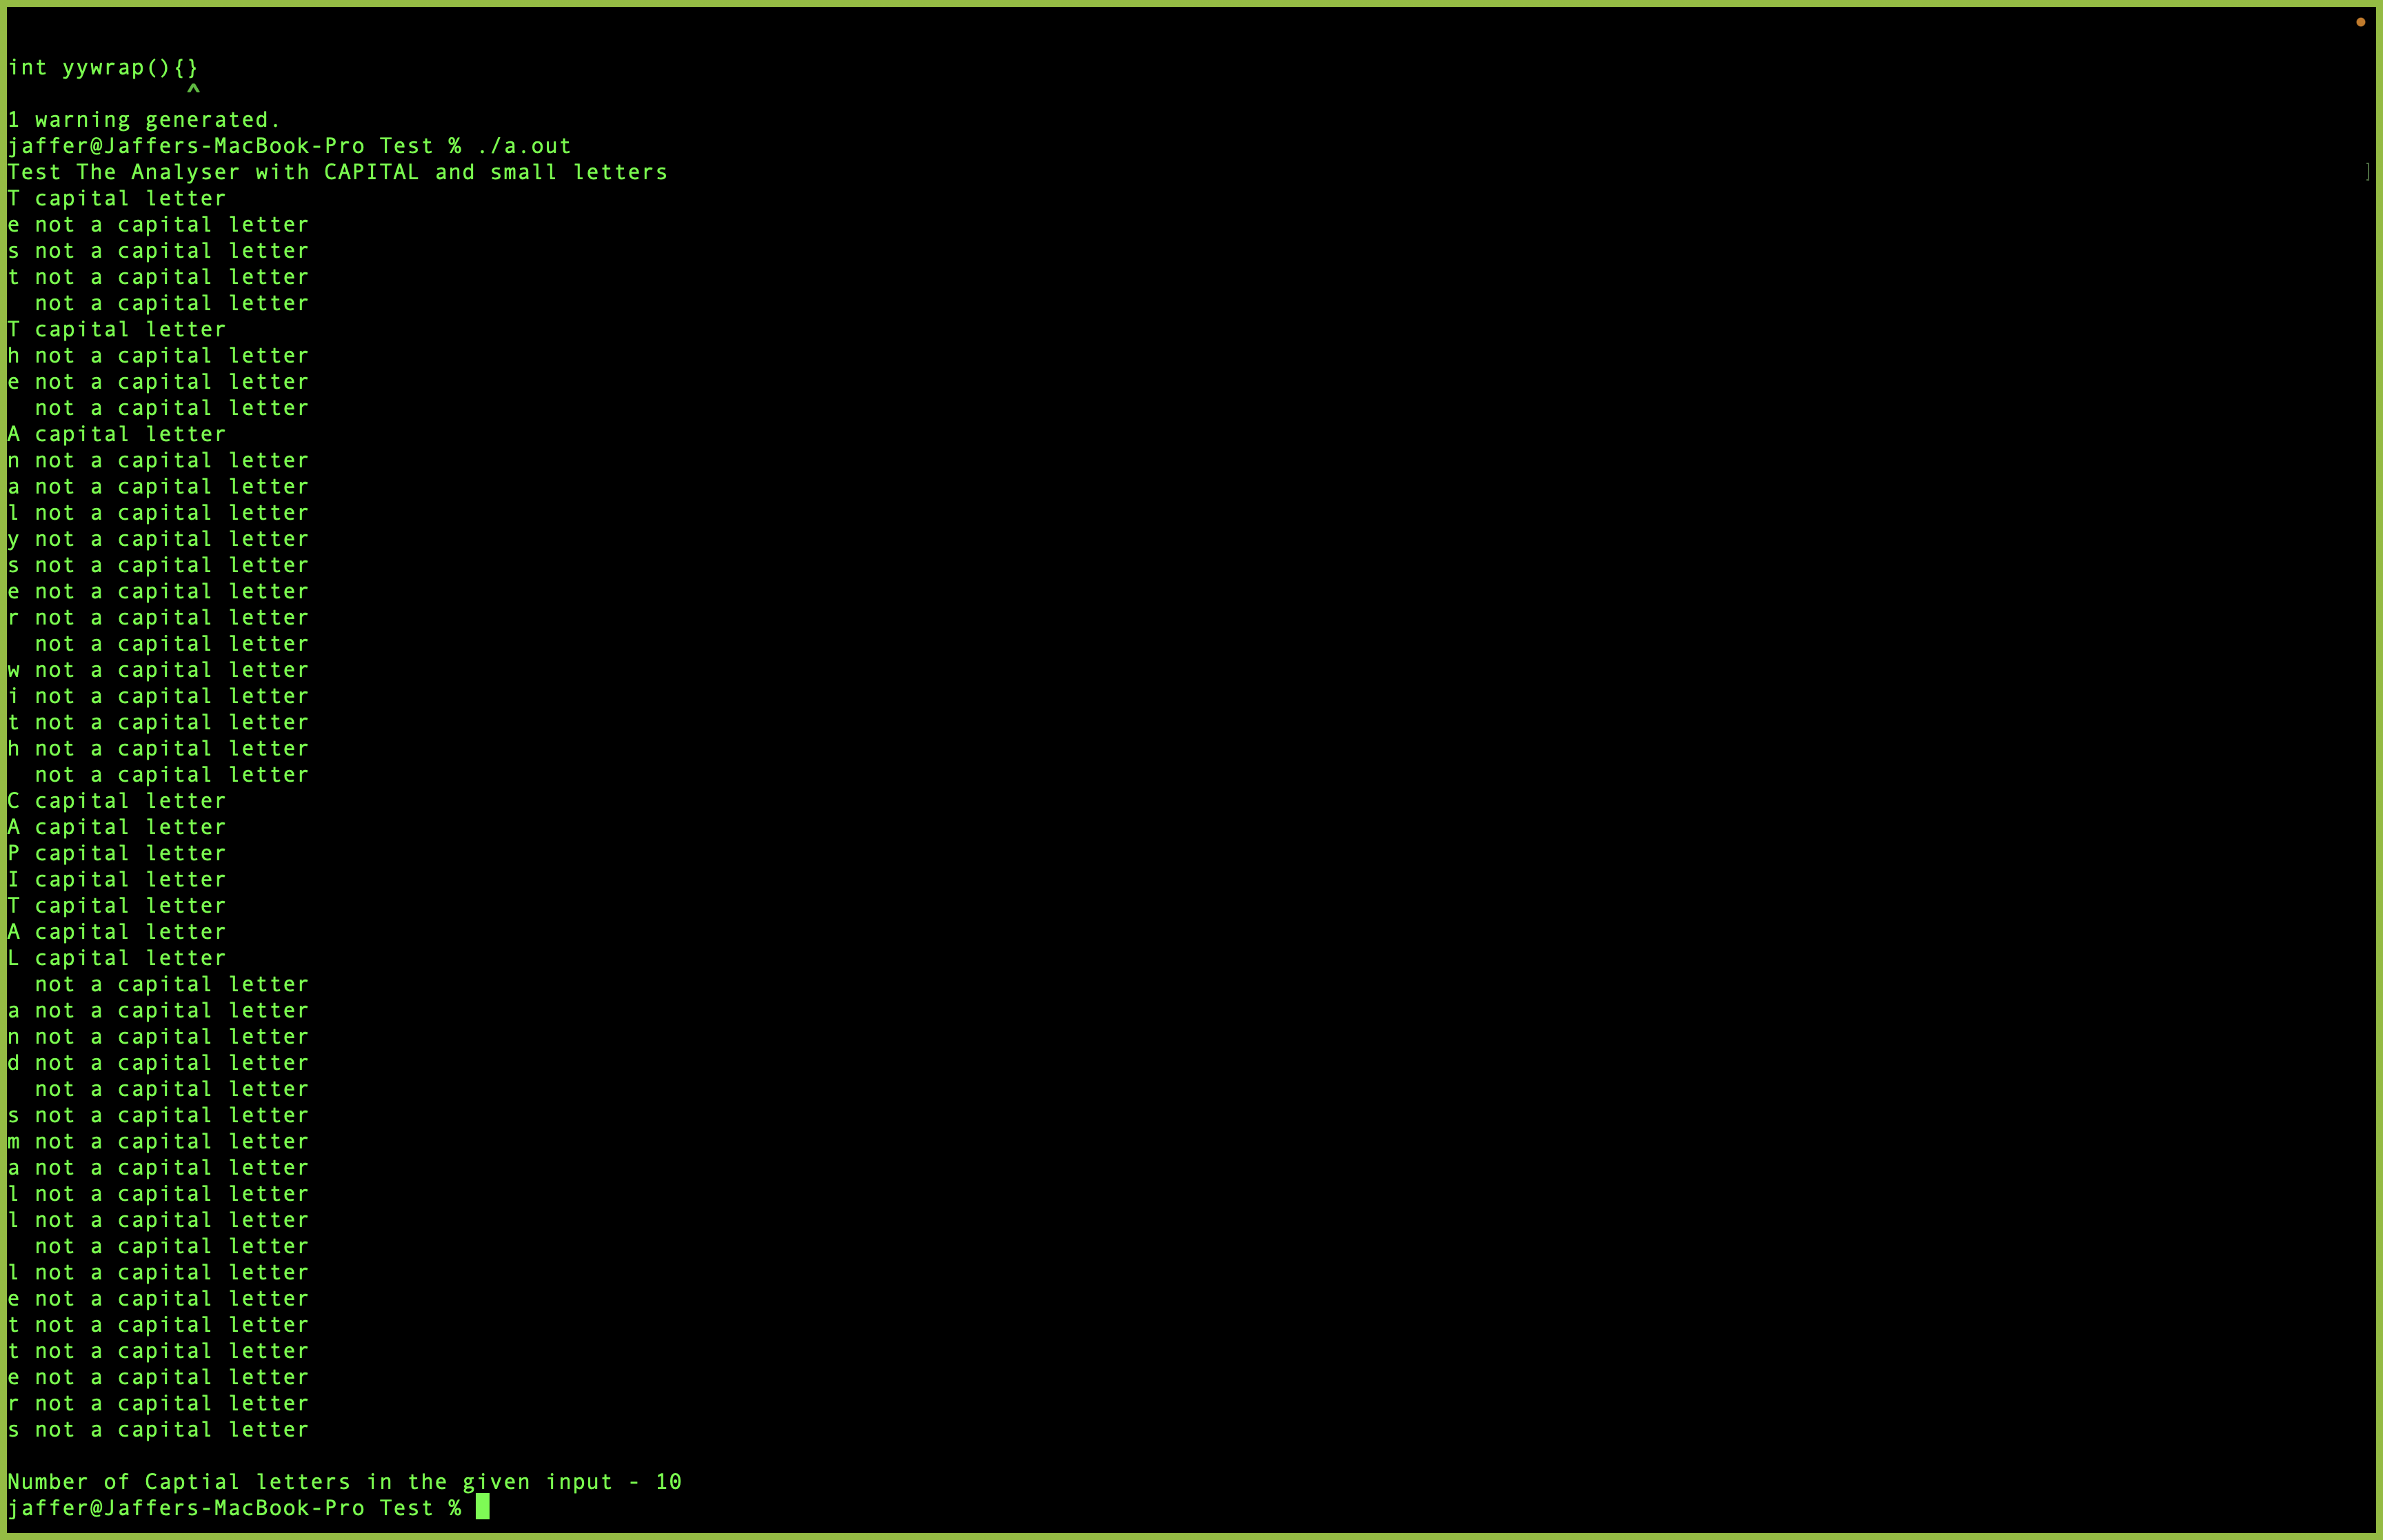

# BISON

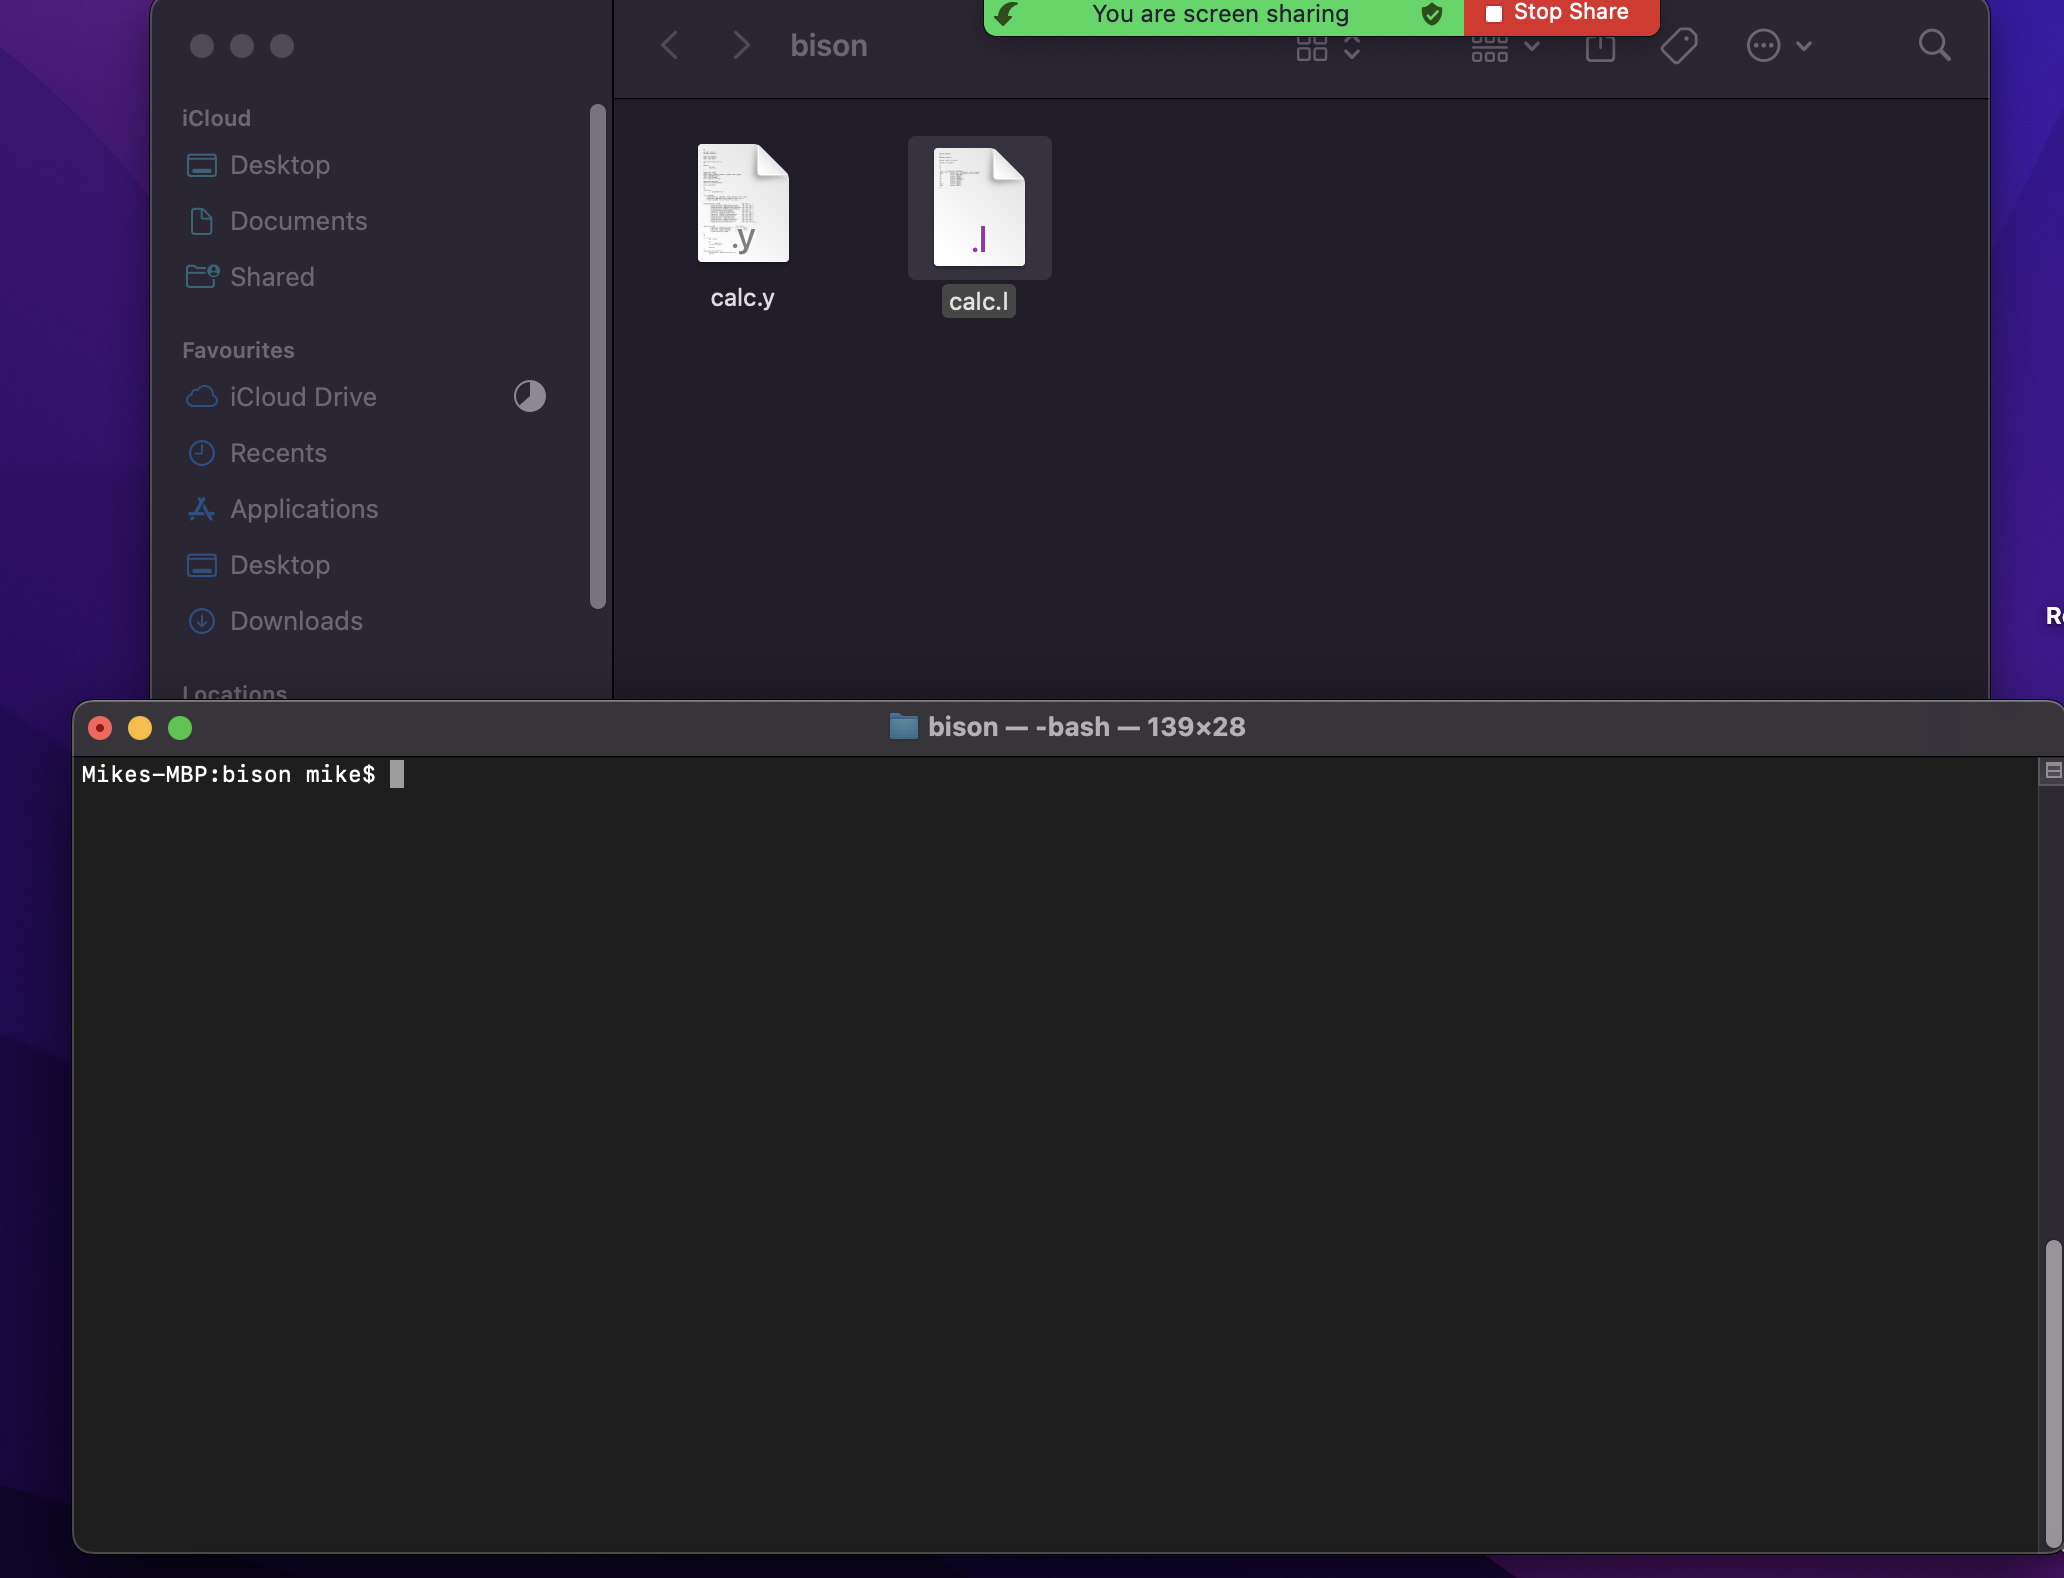

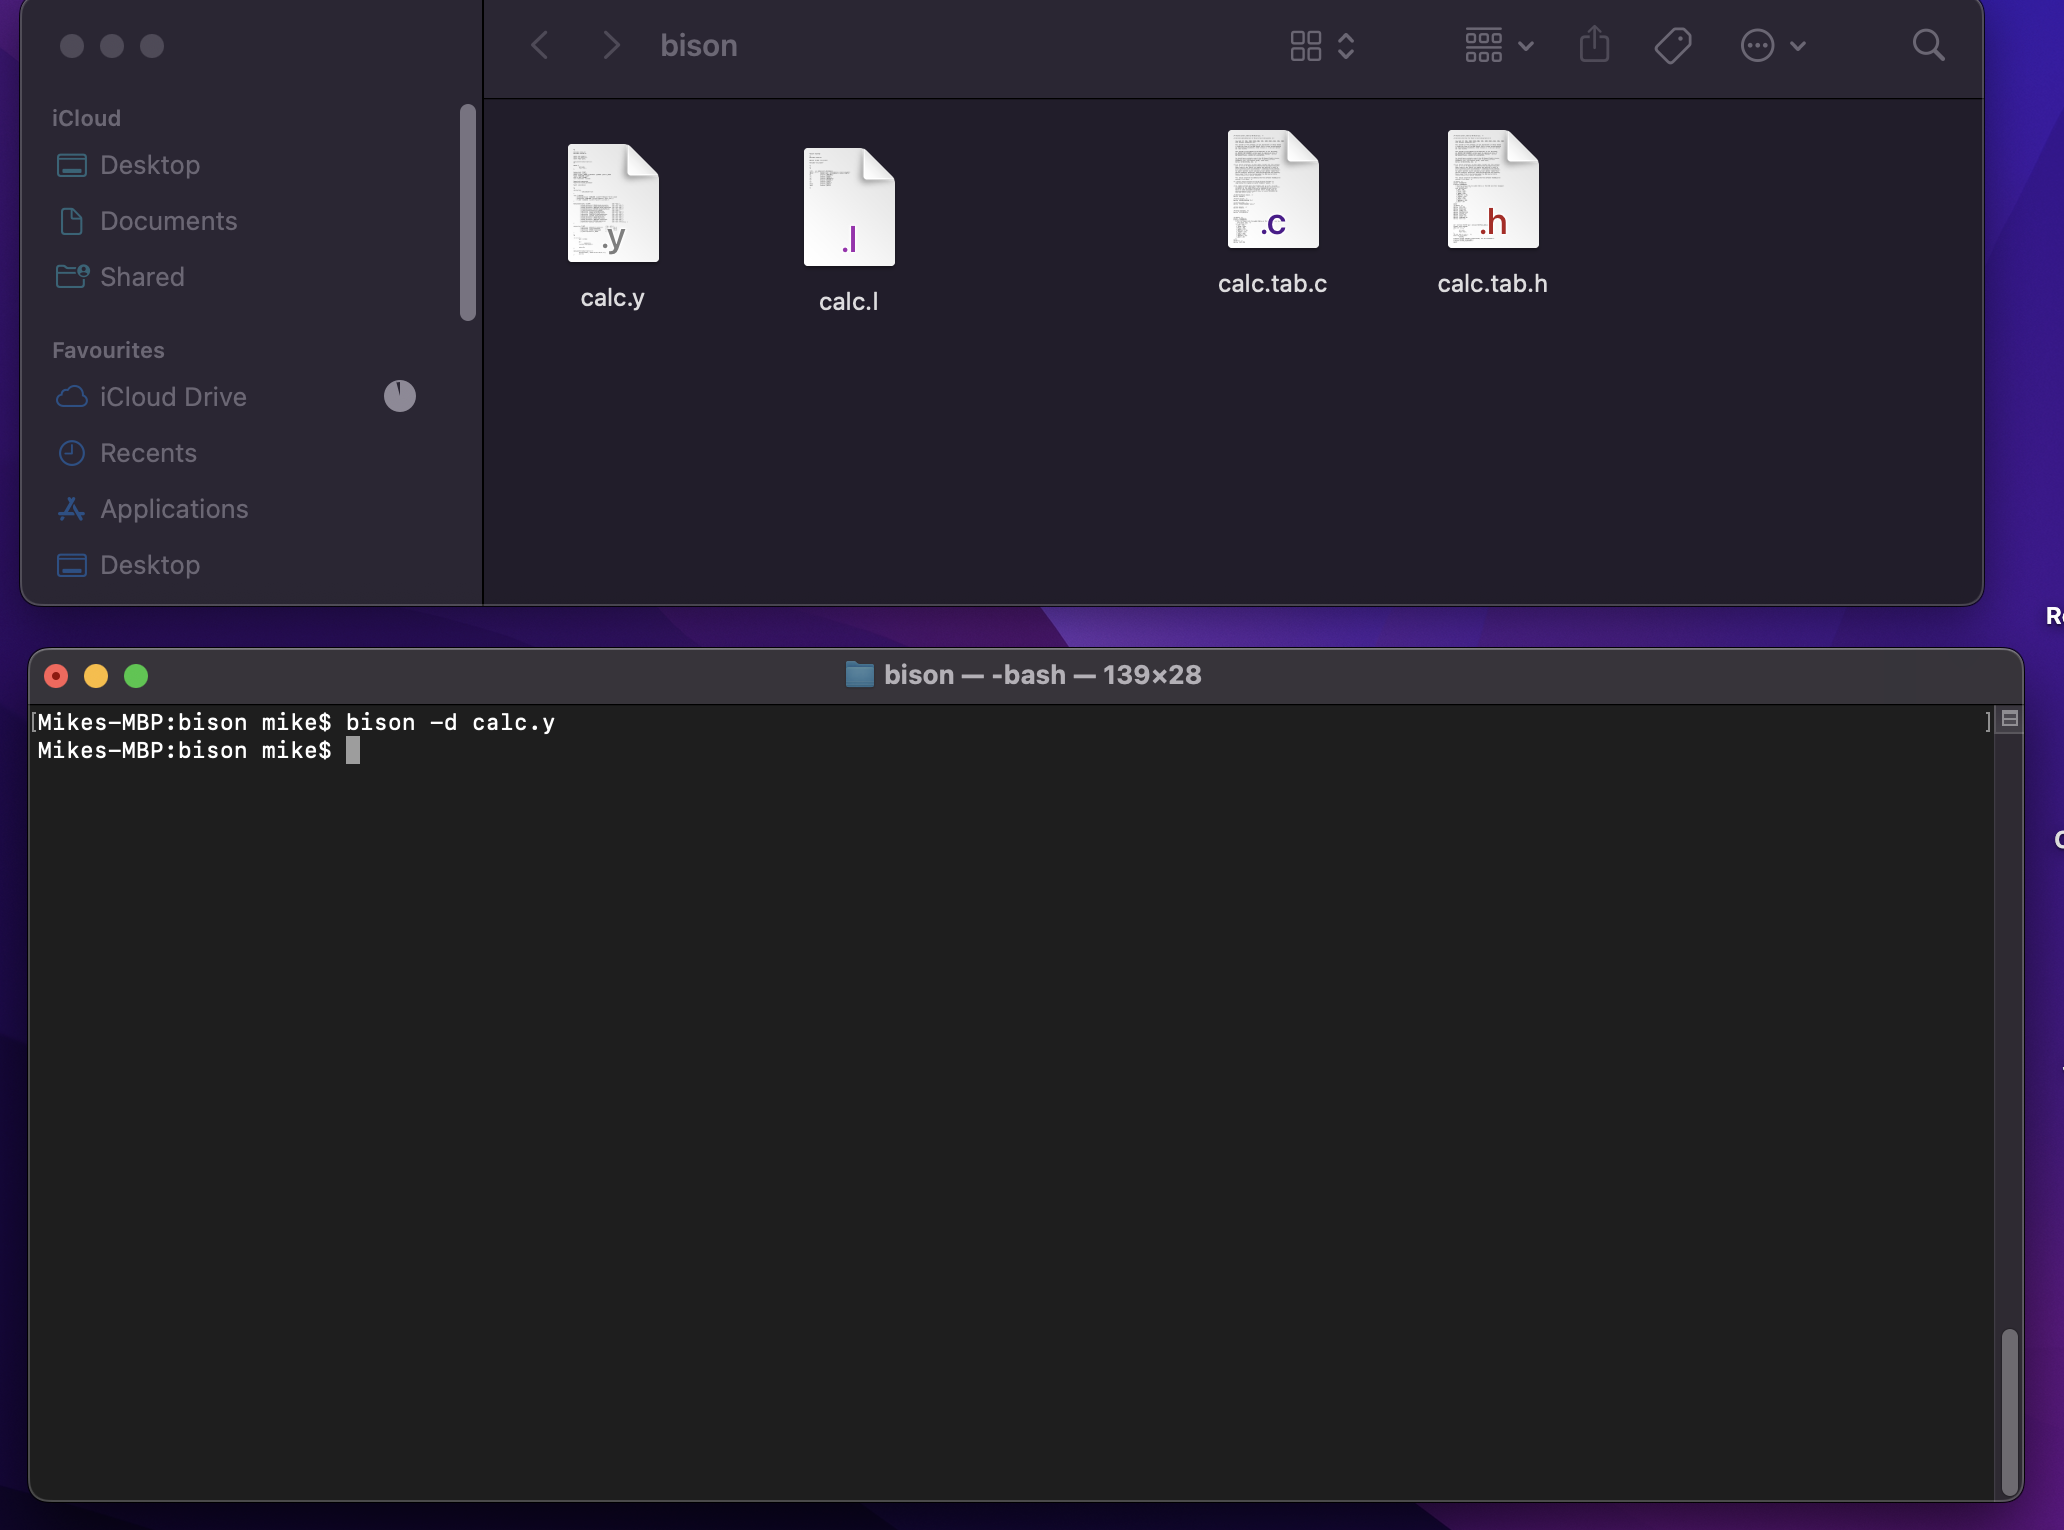

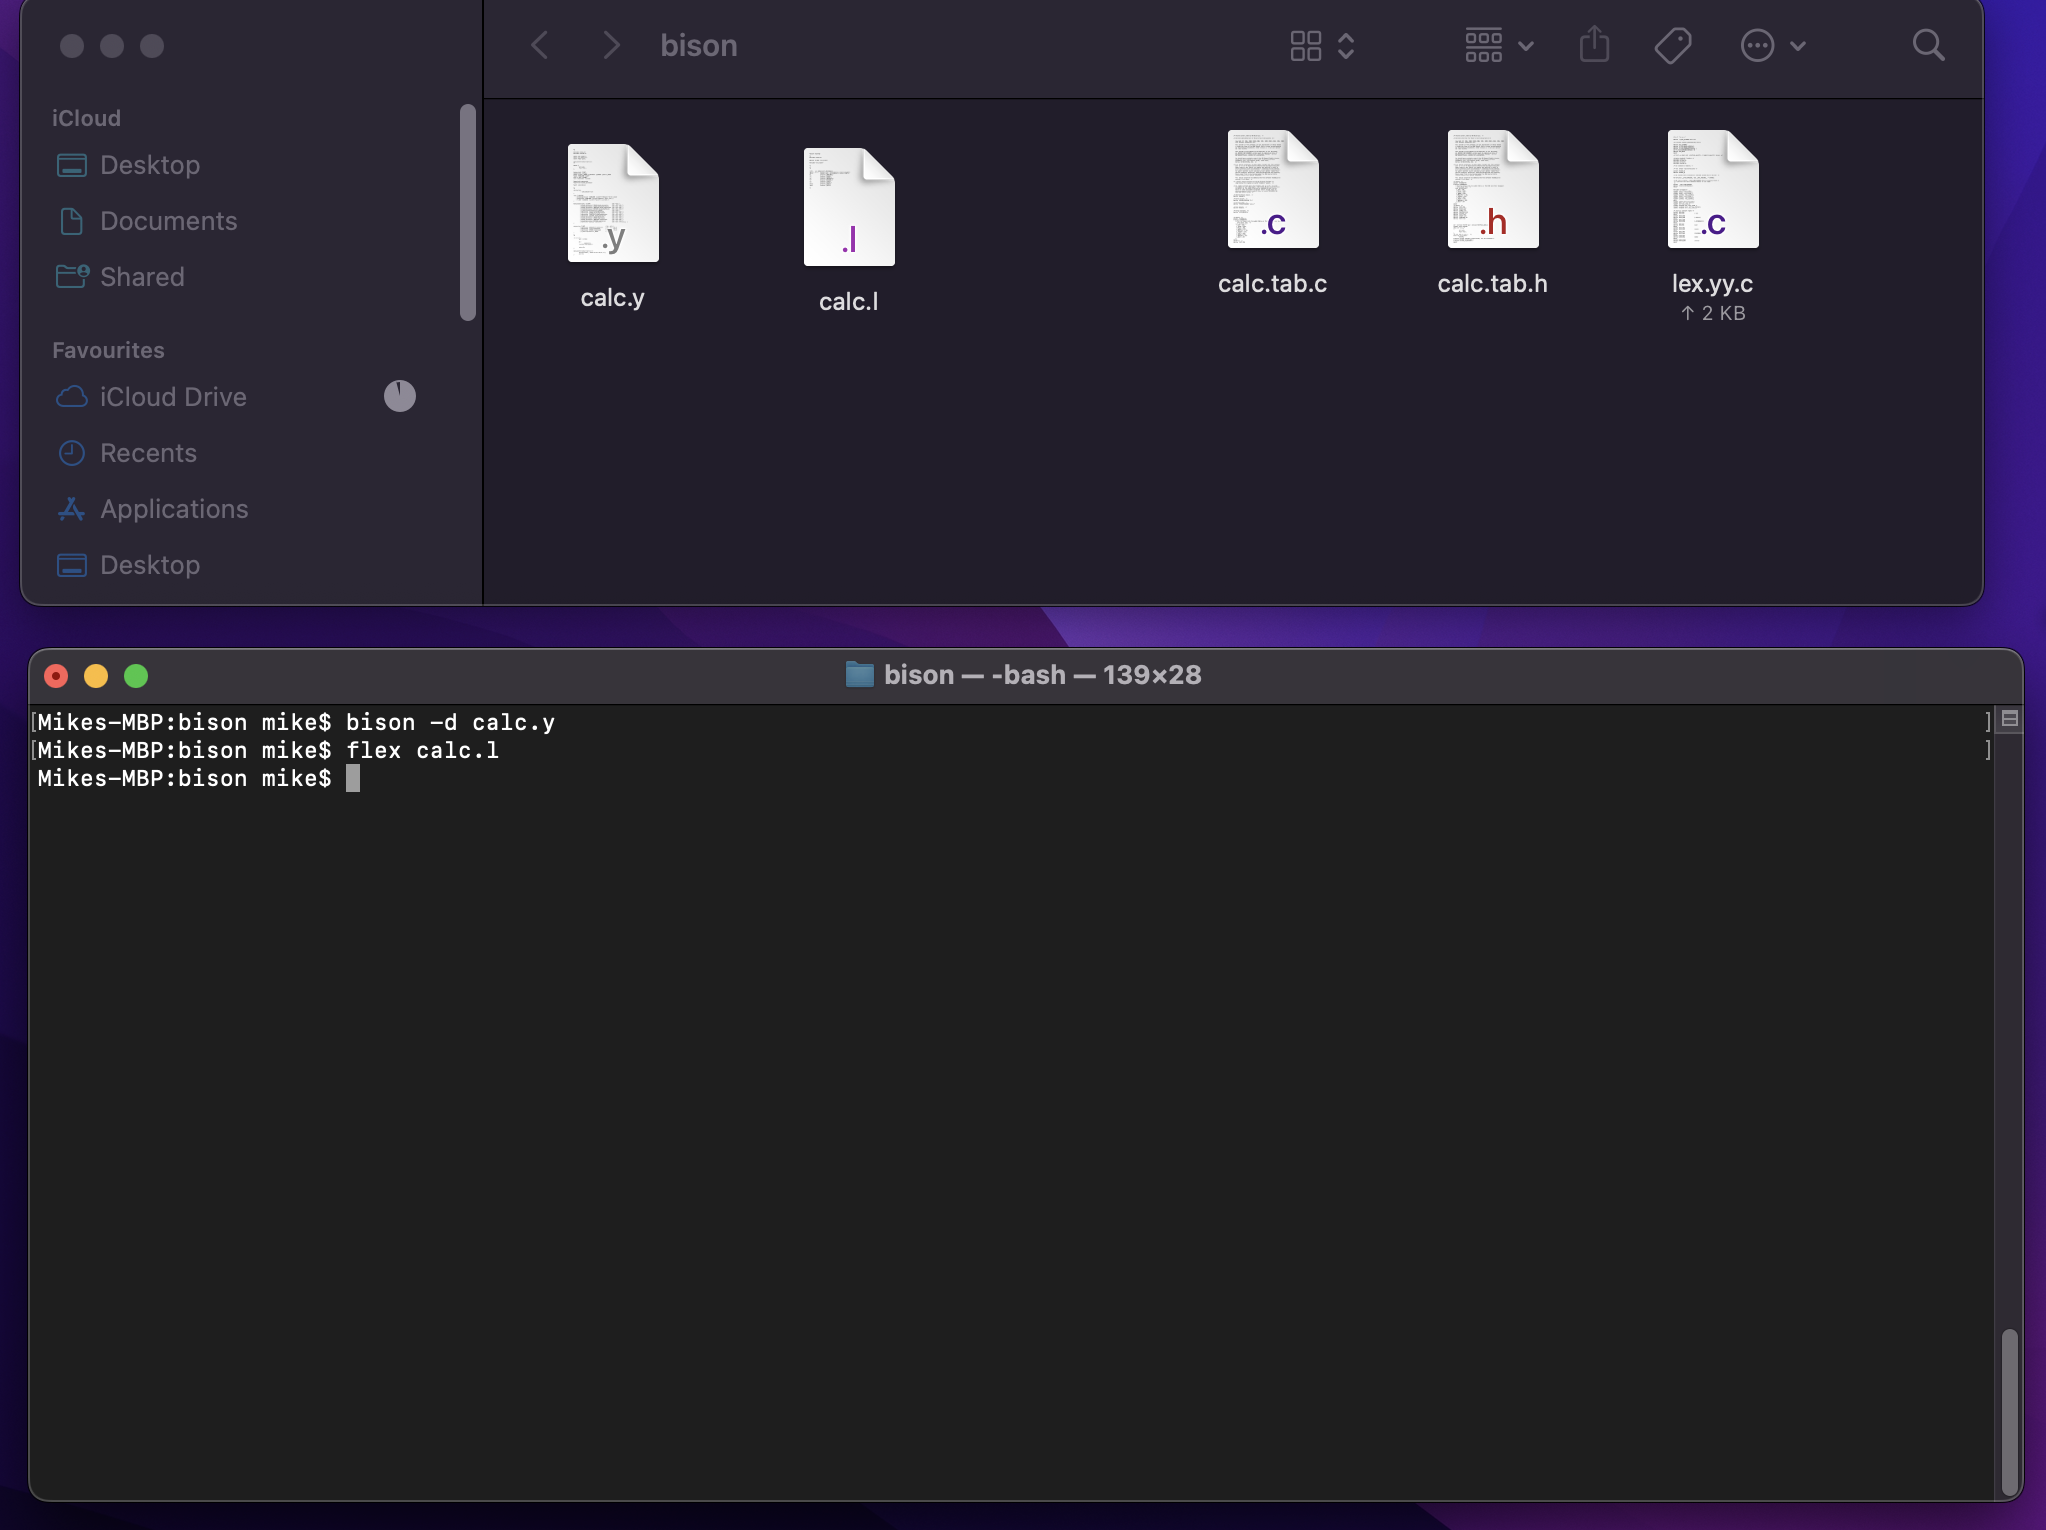

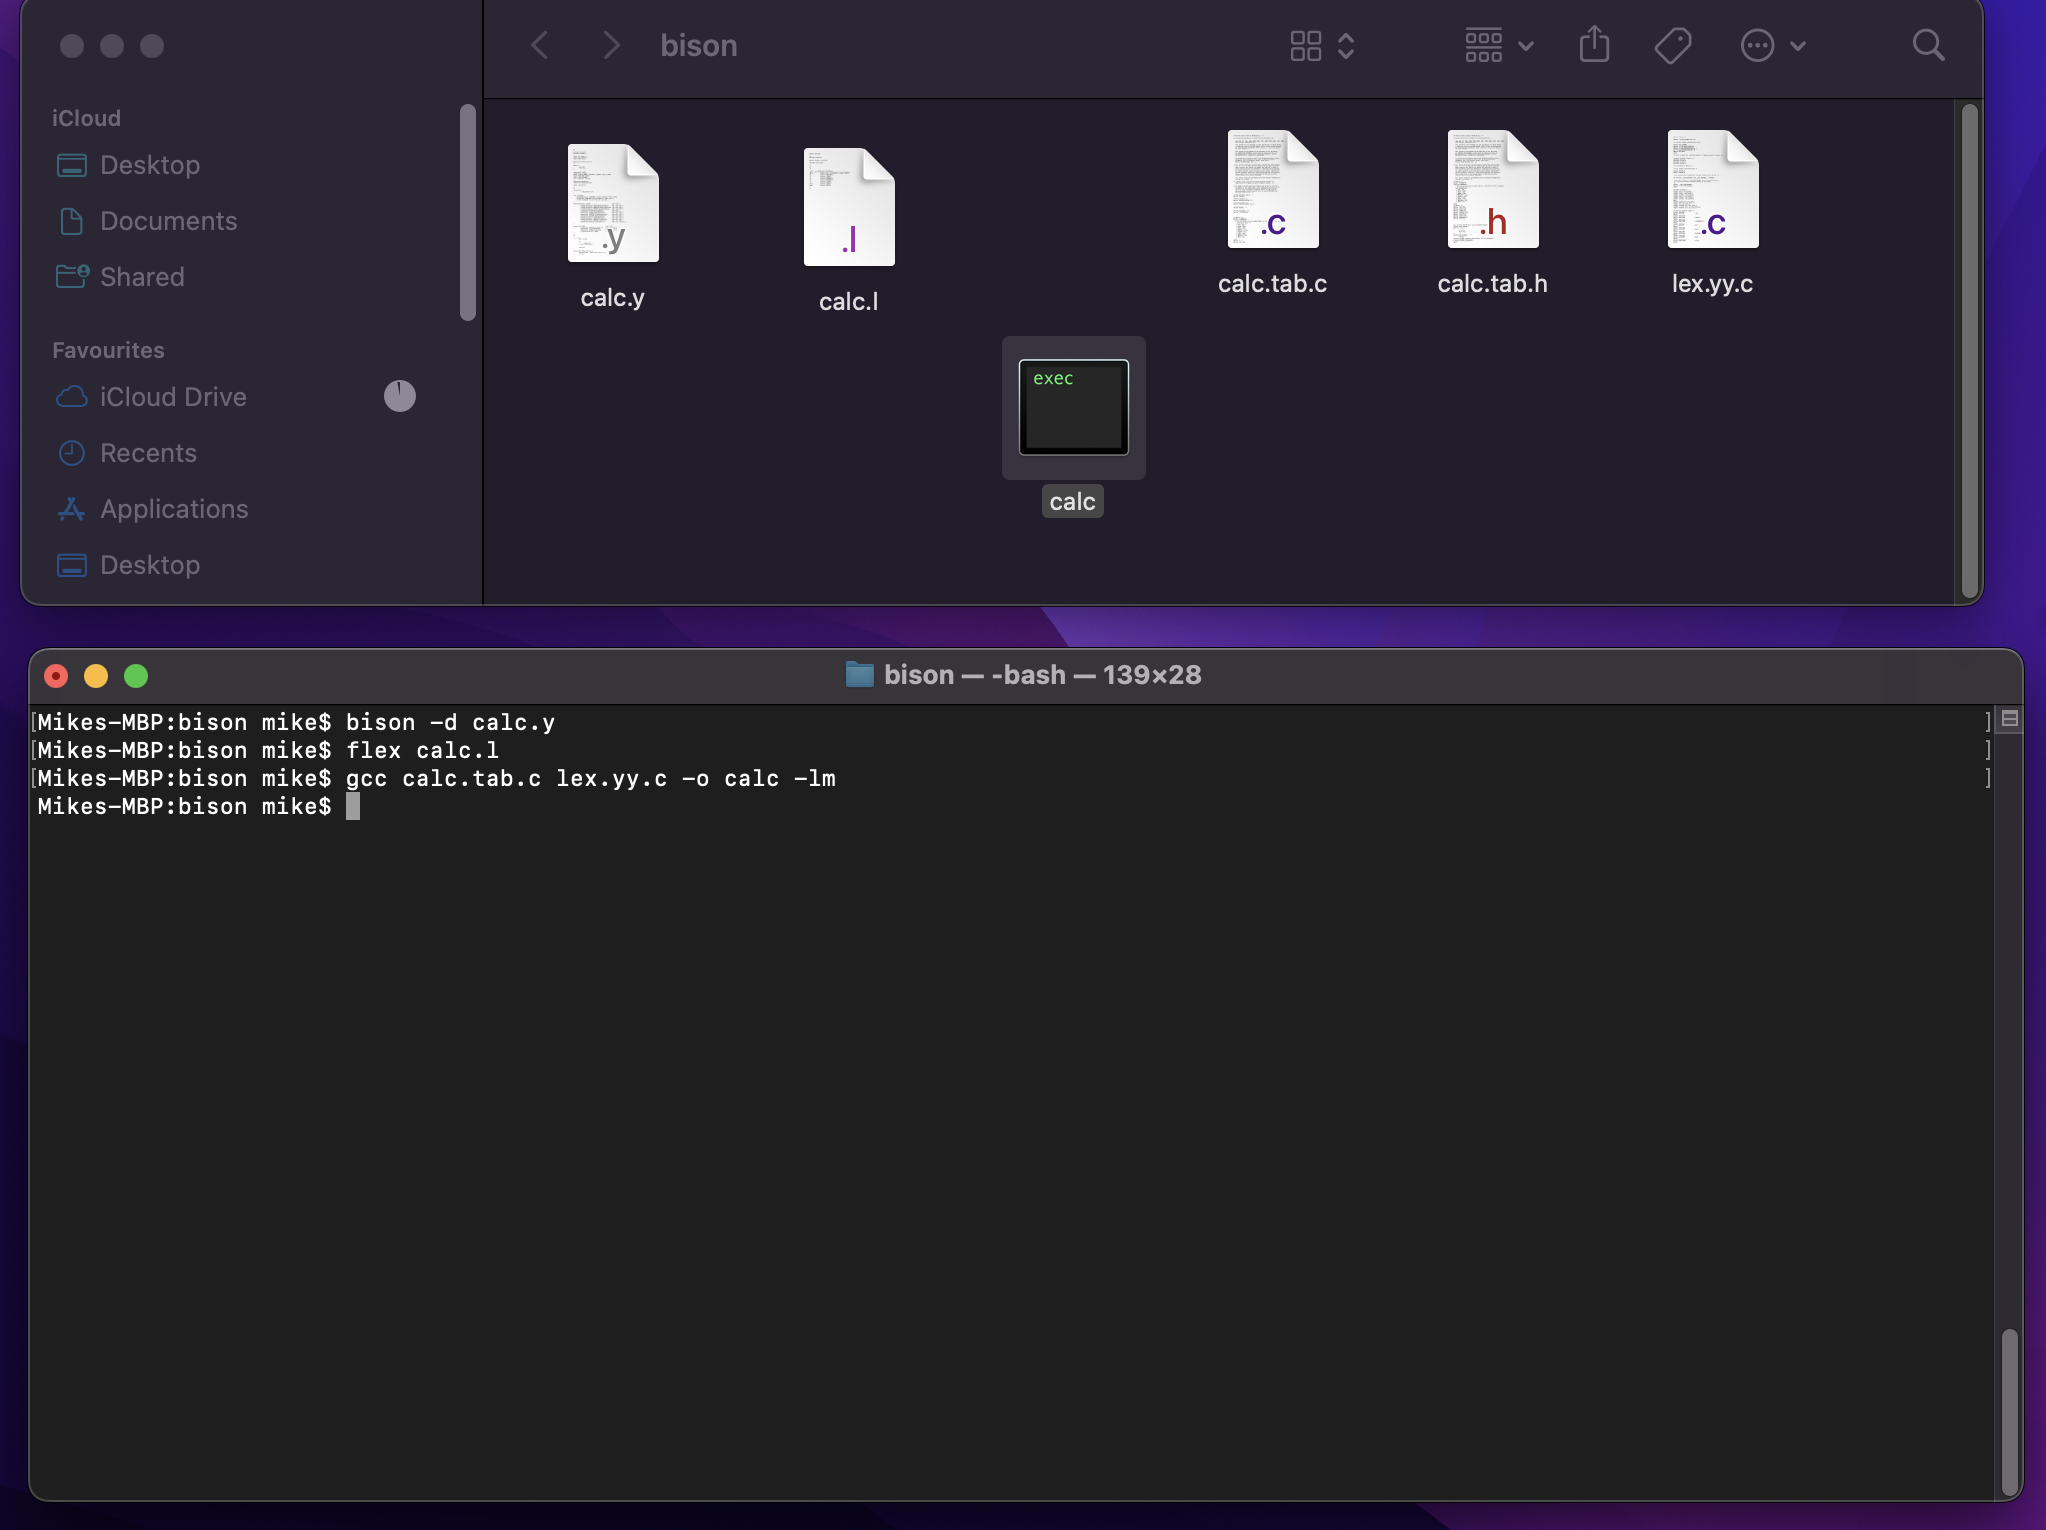

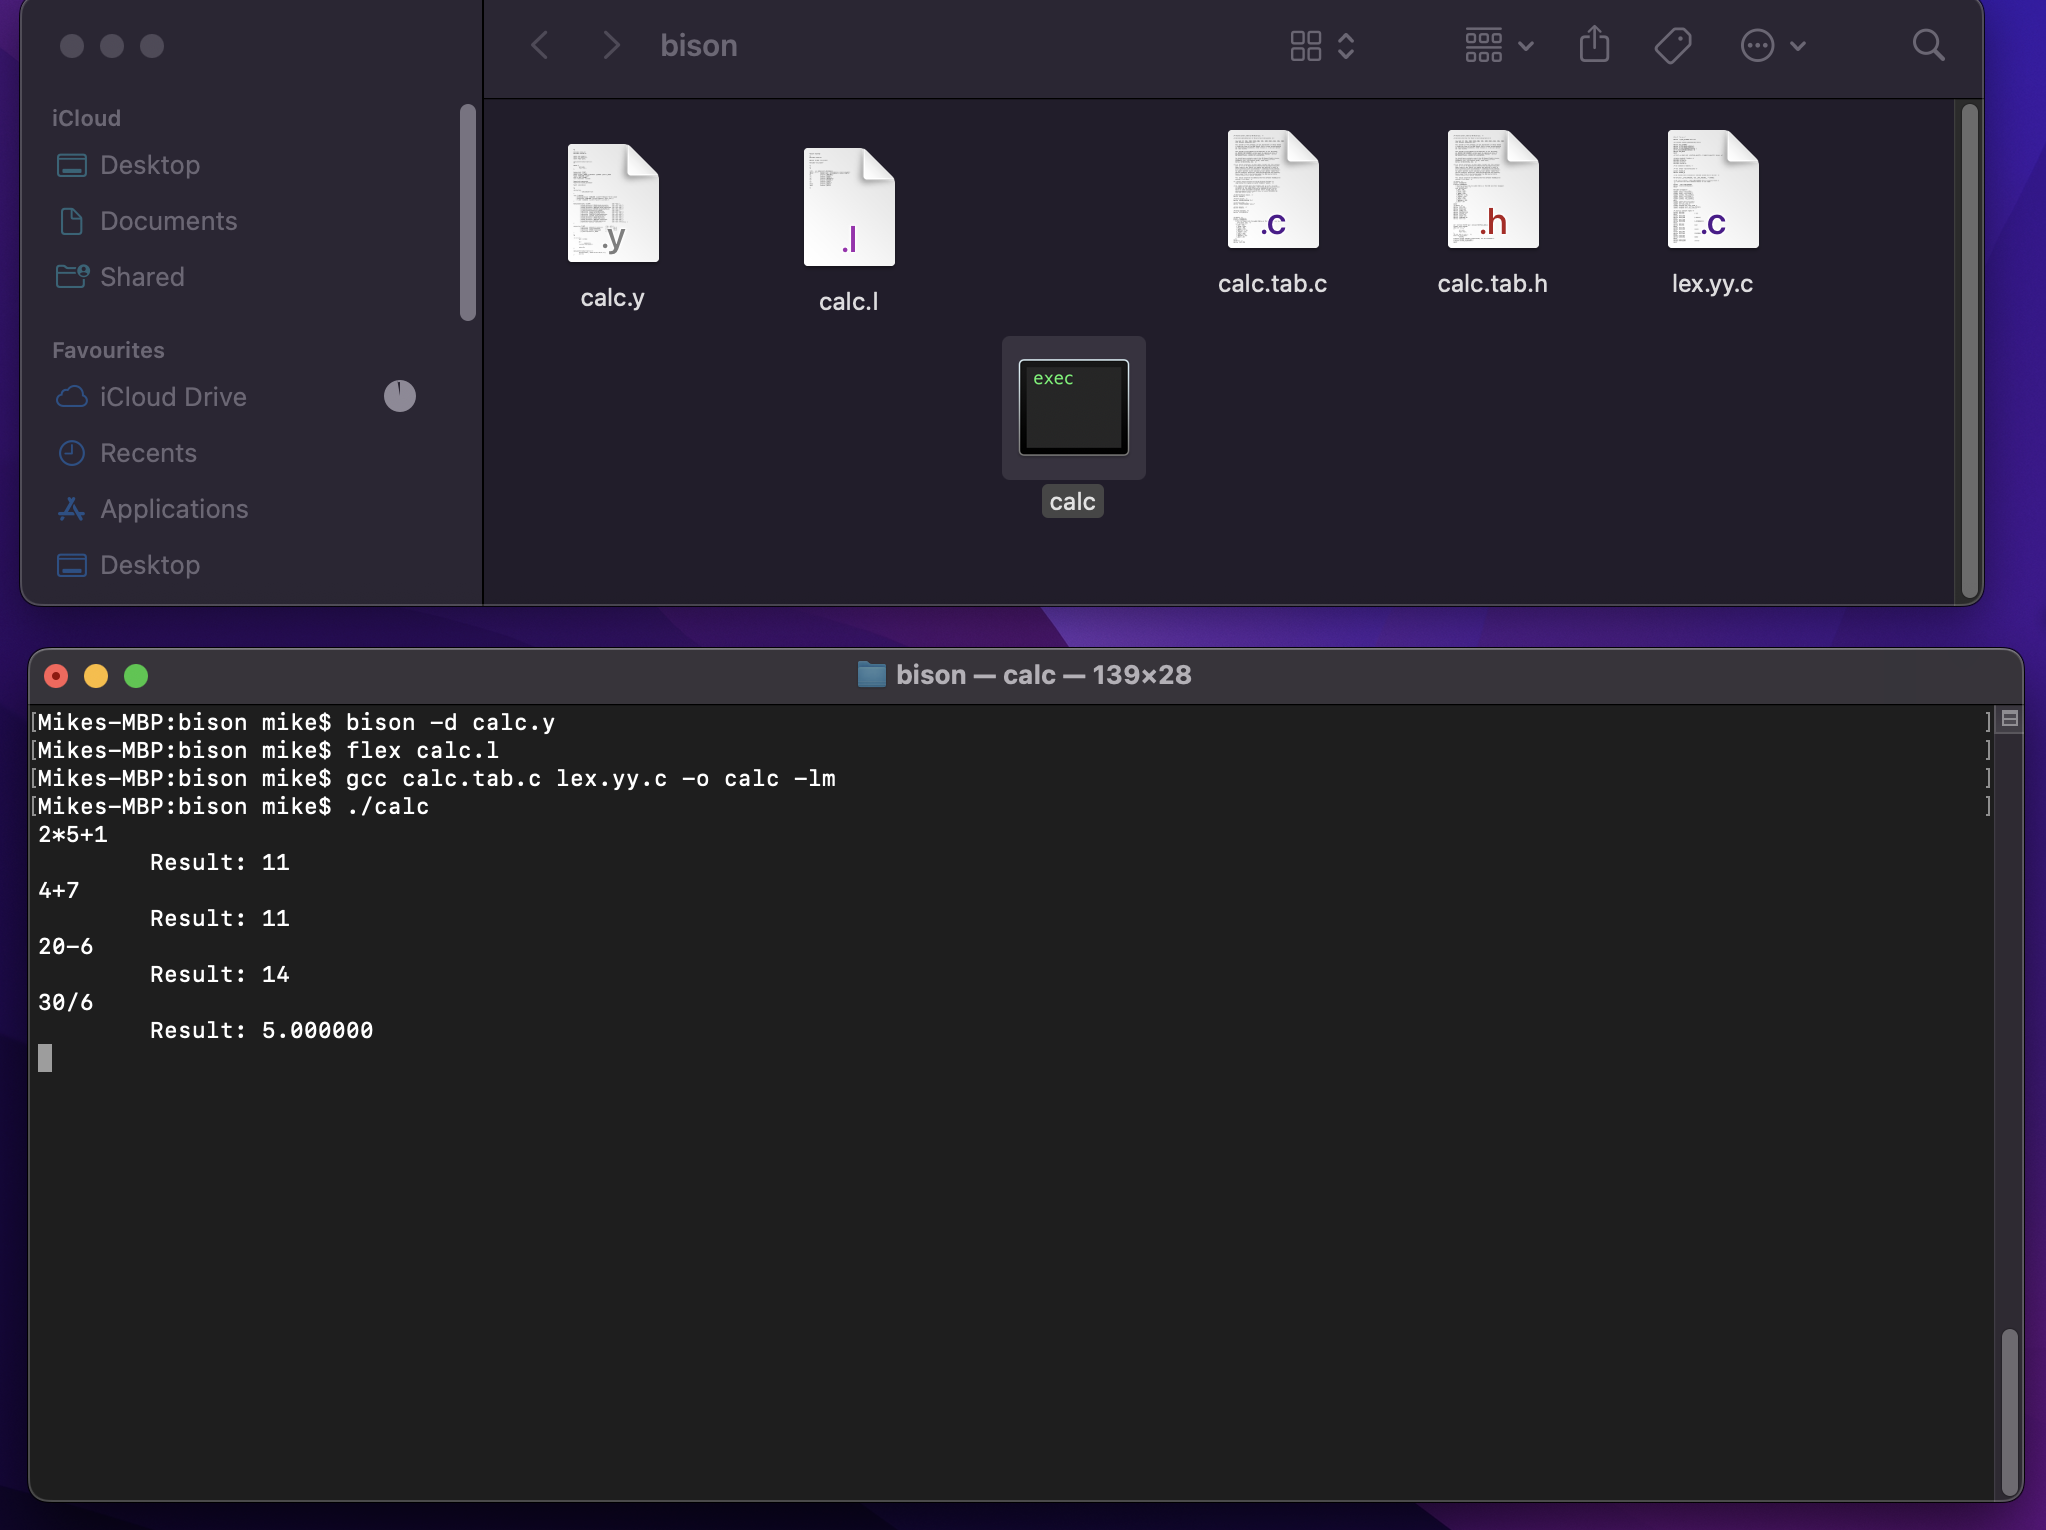

##LAB 3


Using an example or illustration, explain what is predictive parsing?

*  This is type of parsing where we look ahead in the input and choose the right production rule based on the context. It is meant to avoid backtracking.
the image below illustrates how predictive parsing happens.

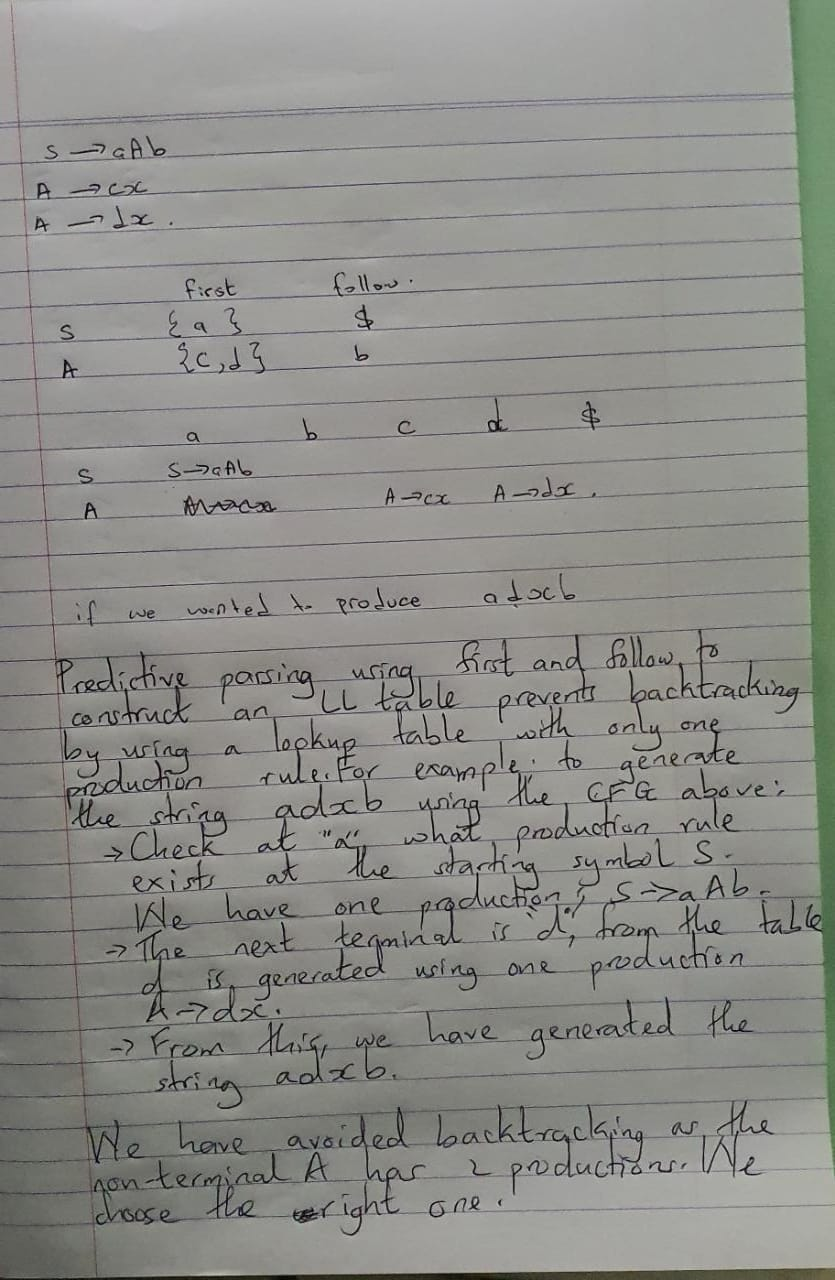




##  What is LL(1) parser?

It is a top-down parser that uses a one step look ahead to validate an input string.
LL(1) parsing is the process of using a lookup table that has row labels of non-terminals and column labels of terminals. These labels are used to query the table for the right production rule to use. In each intersection there exists only one production or none.

##  Why do we get the First () and Follow () i.e. what do these two functions Really Represent?

This is illustrated by the image below.

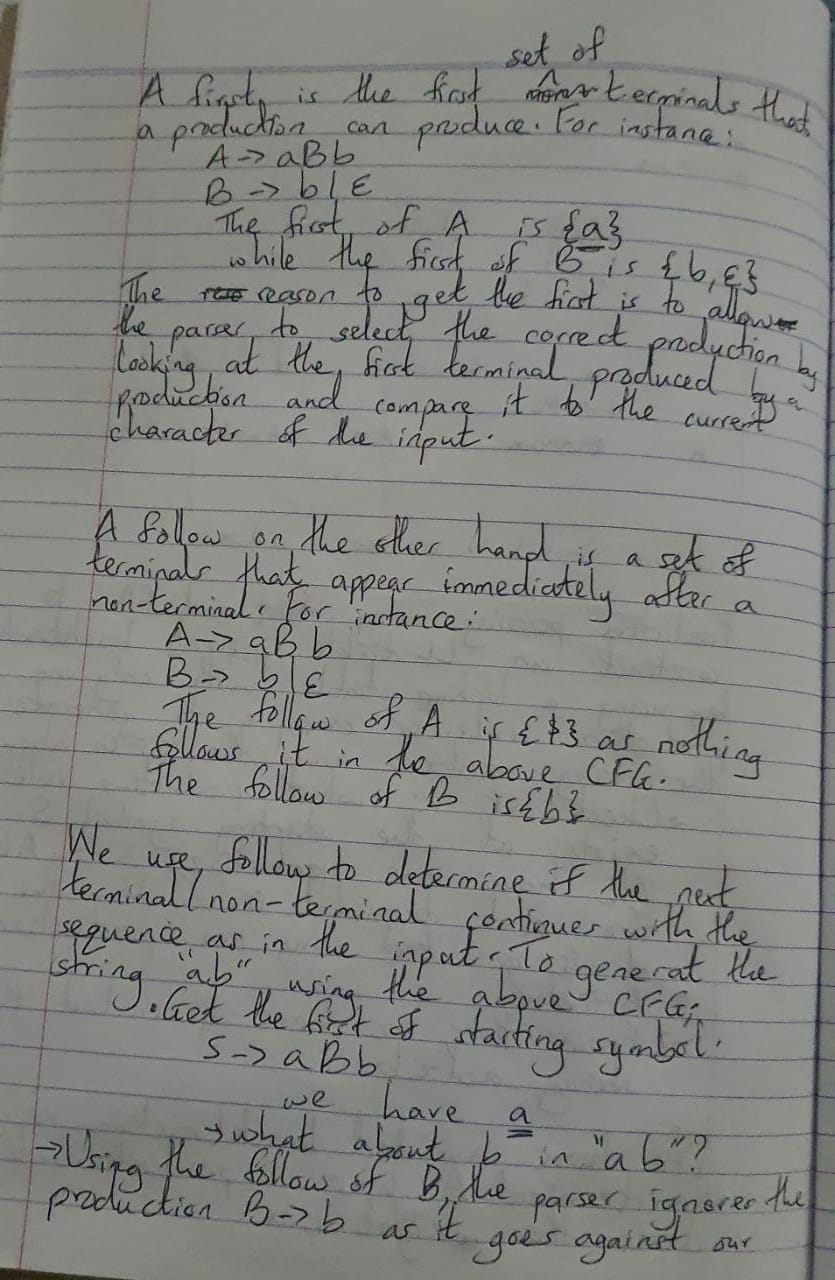





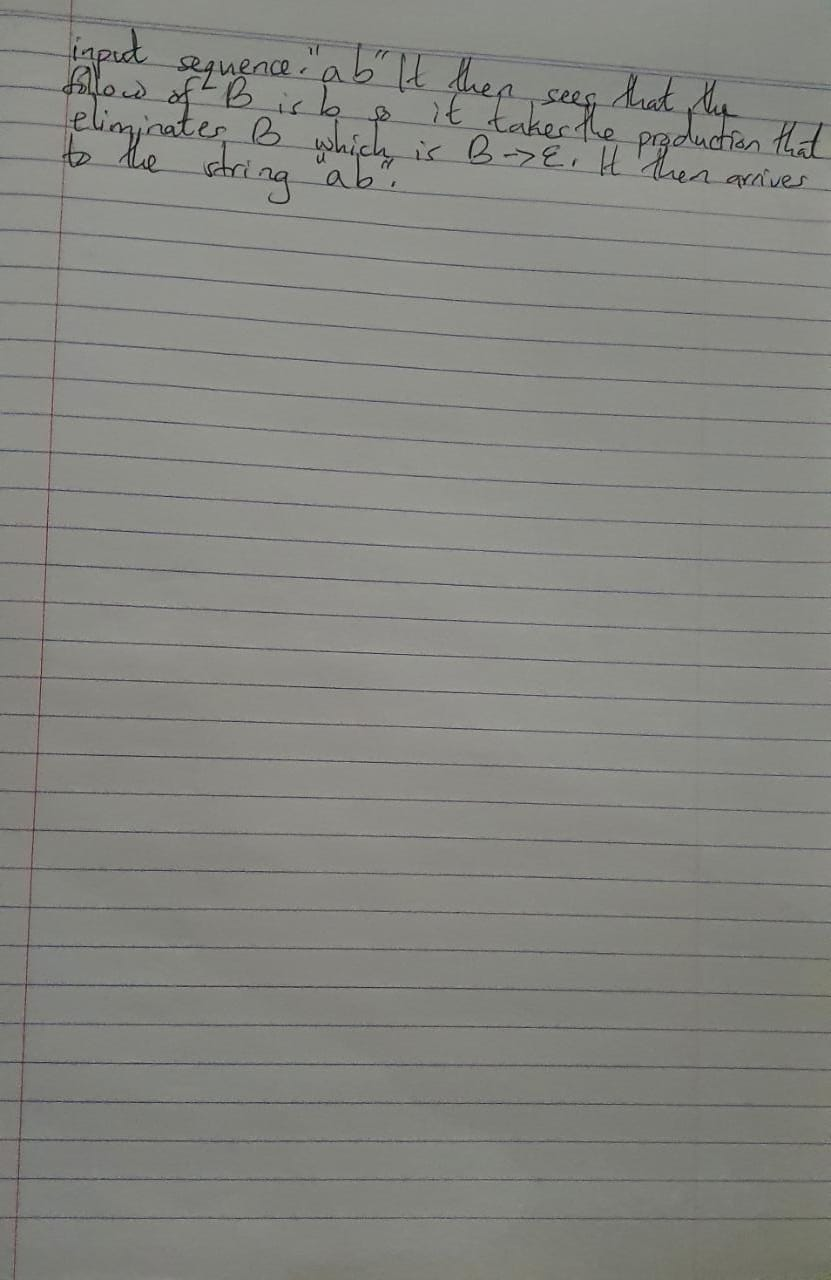

# Are there any unique attributes associated with Top-Down parsing?
* Top down parsing uses a left to right derivation 
* Top down approach stars evaluating the parse tree from the top moving downwards
* Recursive descent is a top-down parsing technique that constructs the parse tree from the top and the input is read from left to right. It uses procedures for every terminal and non-terminal entity. This parsing technique recursively parses the input to make a parse tree, which may or may not require back-tracking. But the grammar associated with it (if not left factored) cannot avoid back-tracking. 

## LAB 4

Review what syntax analysis is and in a few words, describe what this phase of compiler construction entails.

* => Syntax analysis is the second phase of the frontend of a compiler. In this 
phase, we use Context Free Grammars to check for obedience of rules. Using the CFG, the parser determines whether an input string is accepted or rejected. There are two types of parsers: Top-down and bottom-up parsers. 
Top-down parsers derive the input string starting from the starting symbol while bottom-up parsers start from the string itself to the starting symbol.

* => Top-down parsers suffer from backtracking and left recursion. The solution to backtracking is predictive parsing where the parser looks ahead to allow it to choose the correct production. This is possible using a lookup table constructed using the first and follow of non-terminals.

* => The LL(1) parser is a predictive parser that looks one symbol ahead hence the 1 in the name.

* => The solution to the left recursion problem is to use right recursion.

### Calculator Lexical analyzer

A lexical anaylzer file has 3 sections :

* Declarations - This is our library dependency list

* Definitions - this is an optional field

* Rules - these are regular expressions that identify a token

* User subroutines- these are oridinary C code


The rules in the below lexical analyzer return the corresponding token for each character or set of characters passed to the analyzer 
for example: if the analyzer recieves 10.5 + 1
it returns T_FLOAT T_PLUS T_INT


In [ ]:
%option noyywrap

%{
#include <stdio.h>

#define YY_DECL int yylex()

#include "calc.tab.h"

%}

%%

[ \t]    ; // ignore all whitespace
[0-9]+\.[0-9]+     {yylval.fval = atof(yytext); return T_FLOAT;}
[0-9]+   	 {yylval.ival = atoi(yytext); return T_INT;}
\n   	 {return T_NEWLINE;}
"+"   	 {return T_PLUS;}
"-"   	 {return T_MINUS;}
"*"   	 {return T_MULTIPLY;}
"/"   	 {return T_DIVIDE;}
"("   	 {return T_LEFT;}
")"   	 {return T_RIGHT;}
"exit"   	 {return T_QUIT;}
"quit"   	 {return T_QUIT;}

%%


### Calculator Parser File

The parser has the following sections:

*   Declarations - Declarations for any variables or constants used in other parts of the grammar file
include statements to use other files as part of this file (used for library header files)
Statements that define processing conditions for the generated parser
*   Definitions- The definition part includes information about the tokens used in the syntax definition
e.g %token <ival> T_INT
** for %left :
If the operator ~ has left associativity, the expression a ~ b ~ c would be interpreted as (a ~ b) ~ c. If the operator has right associativity, the expression would be interpreted as a ~ (b ~ c)
** for %type:
The %type keyword requires a <Tag>. The use of <Tag> specifies that the tokens named on the line are to be of the same C type as the union member referenced by <Tag>
** for %start ⁉
This shows the starting terminal for the context free grammar 


*   Rules- The rules part contains grammar definition in a modified BNF form. 
** The rules section contains a context free grammar for specifying a simple calculator operations.
*   Auxillary Routines-The auxiliary routines part is only C code.
The C code in the below cell demonstrates the process of getting standard input from the terminal or console and passing that input as argument to the YACC parser



In [ ]:
%{

#include <stdio.h>
#include <stdlib.h>

extern int yylex();
extern int yyparse();
extern FILE* yyin;

void yyerror(const char* s);
%}

%union {
    int ival;
    float fval;
}

%token<ival> T_INT
%token<fval> T_FLOAT
%token T_PLUS T_MINUS T_MULTIPLY T_DIVIDE T_LEFT T_RIGHT
%token T_NEWLINE T_QUIT
%left T_PLUS T_MINUS
%left T_MULTIPLY T_DIVIDE

%type<ival> expression
%type<fval> mixed_expression

%start calculation

%%

calculation:
   	| calculation line
;

line: T_NEWLINE
	| mixed_expression T_NEWLINE { printf("\tResult: %f\n", $1);}
	| expression T_NEWLINE { printf("\tResult: %i\n", $1); }
	| T_QUIT T_NEWLINE { printf("bye!\n"); exit(0); }
;

mixed_expression: T_FLOAT            			  { $$ = $1; }
      | mixed_expression T_PLUS mixed_expression     { $$ = $1 + $3; }
      | mixed_expression T_MINUS mixed_expression     { $$ = $1 - $3; }
      | mixed_expression T_MULTIPLY mixed_expression { $$ = $1 * $3; }
      | mixed_expression T_DIVIDE mixed_expression     { $$ = $1 / $3; }
      | T_LEFT mixed_expression T_RIGHT   	  { $$ = $2; }
      | expression T_PLUS mixed_expression          { $$ = $1 + $3; }
      | expression T_MINUS mixed_expression          { $$ = $1 - $3; }
      | expression T_MULTIPLY mixed_expression      { $$ = $1 * $3; }
      | expression T_DIVIDE mixed_expression     { $$ = $1 / $3; }
      | mixed_expression T_PLUS expression          { $$ = $1 + $3; }
      | mixed_expression T_MINUS expression          { $$ = $1 - $3; }
      | mixed_expression T_MULTIPLY expression      { $$ = $1 * $3; }
      | mixed_expression T_DIVIDE expression     { $$ = $1 / $3; }
      | expression T_DIVIDE expression   	  { $$ = $1 / (float)$3; }
;

expression: T_INT   			 { $$ = $1; }
      | expression T_MULTIPLY expression    { $$ = $1 * $3; }
      | expression T_PLUS expression    { $$ = $1 + $3; }
      | expression T_MINUS expression    { $$ = $1 - $3; }
      | T_LEFT expression T_RIGHT   	 { $$ = $2; }
;

%%

int main() {
    yyin = stdin;

    do {
   	 yyparse();
    } while(!feof(yyin));

    return 0;
}

void yyerror(const char* s) {
    fprintf(stderr, "Parse error: %s\n", s);
    exit(1);
}


Using Flex (lexical analyzer) and Bison (yacc), show how one can develop a simple syntax analyzer. 



# References

1. https://web.stanford.edu/class/archive/cs/cs143/cs143.1128/handouts/120%20Introducing%20bison.pdf
2. https://www.javatpoint.com/lex
3. https://silcnitc.github.io/lex.html
4. http://alumni.cs.ucr.edu/~lgao/teaching/flex.html
5. https://www.geeksforgeeks.org/introduction-to-yacc/
6. https://www.tutorialspoint.com/compiler_design/compiler_design_top_down_parser.htm#

